In [1]:
# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()

# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

# Create a directory and mount Google Drive using that directory.
!mkdir -p drive
!google-drive-ocamlfuse drive

print 'Files in Drive:'
!ls drive/

# Create a file in Drive.
!echo "This newly created file will appear in your Drive file list." > drive/created.txt

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.
Files in Drive:
101-python-v1-06-list-sort-search-max.pptx.pptx
101-python-v1-06-list-sort-search-max.pptx.pptx.pdf
2\4 Chanokthorn.ods
2_4 Chanokthorn-Tawin.ods
2_4 Chanokthorn Uerpairojkit  3 [Form].zip
2_4 Chanokthorn Uerpairojkit  3.ods
แบบสอบถาม 2_4 Chanokthorn Uerpairojkit.ods
แบบสอบถาม 2_4 Chanokthorn U

In [0]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
import torch

In [3]:
# https://opencv.org/
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2

Selecting previously unselected package libxext6:amd64.
(Reading database ... 18070 files and directories currently installed.)
Preparing to unpack .../libxext6_2%3a1.3.3-1_amd64.deb ...
Unpacking libxext6:amd64 (2:1.3.3-1) ...
Selecting previously unselected package x11-common.
Preparing to unpack .../x11-common_1%3a7.7+19ubuntu3_all.deb ...
Unpacking x11-common (1:7.7+19ubuntu3) ...
Selecting previously unselected package libice6:amd64.
Preparing to unpack .../libice6_2%3a1.0.9-2_amd64.deb ...
Unpacking libice6:amd64 (2:1.0.9-2) ...
Selecting previously unselected package libsm6:amd64.
Preparing to unpack .../libsm6_2%3a1.2.2-1_amd64.deb ...
Unpacking libsm6:amd64 (2:1.2.2-1) ...
Setting up libxext6:amd64 (2:1.3.3-1) ...
Processing triggers for libc-bin (2.26-0ubuntu2) ...
Setting up x11-common (1:7.7+19ubuntu3) ...
update-rc.d: warning: start and stop actions are no longer supported; falling back to defaults
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d 

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np
import cv2
import sys
from torch.autograd import Variable

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
#         self.pool = nn.MaxPool2d(2,2)
#         self.conv1 = nn.Conv2d(3,6,5,stride=1,padding=(2,2))
#         self.conv2 = nn.Conv2d(6,18,5,stride=1,padding=(2,2))
#         self.conv3 = nn.Conv2d(18,27,5,stride=1,padding=(2,2))
#         self.conv4 = nn.Conv2d(27,34,5,stride=1,padding=(2,2))
#         self.fc1 = nn.Linear(6 * 10 * 34, 1024) 
#         self.fc2 = nn.Linear(1024, 512)
#         self.fc3 = nn.Linear(512, 256)
#         self.fc4 = nn.Linear(256,2)

        self.pool = nn.MaxPool2d(2,2)
        self.conv1 = nn.Conv2d(3,6,5,stride=1)
        self.conv2 = nn.Conv2d(6,18,5,stride=1)
        self.conv3 = nn.Conv2d(18,27,5,stride=1)
        self.fc1 = nn.Linear(17 * 33 * 27, 512) 
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 104)
        self.fc4 = nn.Linear(104,2)        

    def forward(self, x):
#         print('shape',x.data.shape)
        x = self.pool(F.relu(self.conv1(x)))
#         print('first layer:',x)
        x = self.pool(F.relu(self.conv2(x)))
#         print('second layer:',x)
        x = F.relu(self.conv3(x))
#         print('third layer:',x)
#         print(x.data.shape)
        x = x.view(-1, 17 * 33 * 27)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
#         print('result: ',x)
        return x


# def outputToTensor(labels):
#     # print(labels)
#     # print(labels.numpy().astype(int))
#     tmp = labels.numpy().astype(int)
#     # print([ np.where(r==1)[0][0] for r in tmp ])
#     tmp = [ np.where(r==1)[0][0] for r in tmp ]
#     tmp = np.array(tmp)
#     tmp = torch.from_numpy(tmp)
#     # print(tmp)
#     return tmp



In [5]:
MODEL_PATH = 'drive/Colab Notebooks/'
net = Net()
net = net.double()
# net = net.cuda()

# name = input("Enter model name : ")
name = 'first'
PATH = MODEL_PATH + name
# net = torch.load(PATH)
net.load_state_dict(torch.load(PATH))
net = net.cuda()
print(net)
print('loaded')

Net(
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv1): Conv2d (3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d (6, 18, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d (18, 27, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=15147, out_features=512)
  (fc2): Linear(in_features=512, out_features=256)
  (fc3): Linear(in_features=256, out_features=104)
  (fc4): Linear(in_features=104, out_features=2)
)
loaded


# New Section

In [0]:
import os
images = [cv2.imread('drive/test images/' + x) for x in os.listdir('drive/test images/')]
# print(images)

In [87]:
print(os.listdir('drive/test images/')[5])

dn-lg.jpg


In [0]:
import operator

CROP_WIDTH = 96
CROP_HEIGHT = 160
STRIDE = 30
COLLECT = 10

def normalize(data):
    data = np.divide(data,255)
    data = data - 0.5
    data = np.transpose(data,(2,1,0))
    return data

def predictHuman(image,scale = 1):
  im_width = image.shape[1]
  im_height = image.shape[0]
  storage = {}
  j = 0
  booler = True
  while ( j + CROP_HEIGHT <= im_height):
    i = 0
    while (i + CROP_WIDTH <= im_width):
      subimage = image[j : j + CROP_HEIGHT , i : i + CROP_WIDTH]
#       imgplot = plt.imshow(subimage)
#       plt.show()
      subimage = normalize(subimage)
      subimage = Variable(torch.from_numpy(subimage).double().cuda())
      subimage = subimage.unsqueeze(0)
      output = net(subimage)
      result =  output.cpu().data.numpy()[0][0]
      if(result >= 0.5):
        storage[(i,j,scale)] = result
      i += STRIDE
      
    j += STRIDE
  sorted_storage = sorted(storage.items(), key=operator.itemgetter(1),reverse=True)
#   print(sorted_storage)
  
#   while( i + CROP_WIDTH <= im_width and j + CROP_HEIGHT <= im_height):
#     subimage = image[j : j + CROP_HEIGHT , i : i + CROP_WIDTH]
#     subimage = normalize(subimage)
#     subimage = Variable(torch.from_numpy(subimage).double().cuda())
#     subimage = subimage.unsqueeze(0)
#     output = net(subimage)
#     print(output)
#     storage[(i,j)] = output.cpu().data.numpy()
#     i += STRIDE
#     j += STRIDE
#   print(storage)
  sorted_storage = sorted_storage[0:COLLECT]
  return sorted_storage
# predictHuman(images[0])

In [0]:
AMOUNT_OF_RECTS = 20

def predictMultiScale(image):
  width = image.shape[1]
  height = image.shape[0]
  scales = [4,3,2,1,0.9,0.8,0.7,0.6,0.5,0.4]
  storage = {}
  for scale in scales:
    if(scale < 1):
      subimage = cv2.resize(image, (0,0), fx=scale, fy=scale) 
    else:
      subimage = cv2.resize(image, (scale*width, scale*height), interpolation = cv2.INTER_CUBIC)
    storage.update(predictHuman(subimage,scale))
    print(scale)
  sorted_storage = sorted(storage.items(), key=operator.itemgetter(1),reverse=True)
  return sorted_storage[0:AMOUNT_OF_RECTS]


def locateHuman(image):
  result = predictMultiScale(image)
  coords = np.ndarray((AMOUNT_OF_RECTS * 2,2))
#   coords = ()
  counter = 0
  for a in result:
    i = a[0][0]
    j = a[0][1]
    scale = a[0][2]
#     coords += ((int(i * scale), int(j * scale)), (int(i * scale) + CROP_WIDTH, int(j * scale) + CROP_HEIGHT) )
    coords[counter, :] = np.array([int(i / scale), int(j / scale)])
    coords[counter + 1, :] = np.array([int(i / scale) + CROP_WIDTH, int(j / scale) + CROP_HEIGHT])
    counter += 2
  coords = coords.astype(int)
#   print(coords)
  return coords
# coords = locateHuman(images[5])

4
3
2
1
0.9
0.8
0.7
0.6
0.5
0.4
(660, 45, 147, 186)


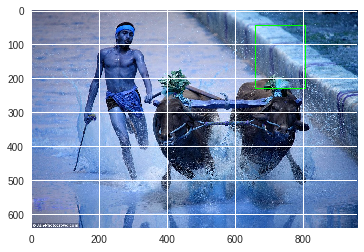

In [41]:
%matplotlib inline

def process(image):
  imcopy = image
  coords = locateHuman(imcopy)
  x,y,w,h = cv2.boundingRect(coords[0:5])
  print(x,y,w,h)
  cv2.rectangle(imcopy,(x,y),(x+w,y+h),(0,255,0),2)
#   cv2.imshow("Image", image)
  imgplot = plt.imshow(imcopy)
process(images[3])

In [41]:
print(tmp[0:5][0][0])
a = (1,2,3)
b = (4,5,6)
a += b
print(a)

(1800, 0, 3)
(1, 2, 3, 4, 5, 6)
